In [50]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
from scipy.signal import filtfilt

%matplotlib notebook
from matplotlib import animation
from matplotlib.animation import FuncAnimation
import numpy as np


df = pd.read_csv('Data set N1/Raw_gait_data_N1 set.csv')
df
time = df.loc[:,"TIME"]
ankle_x= df.loc[:,"RIGHT ANKLE X"]
ankle_y= df.loc[:,"RIGHT ANKLE Y"]
#k1=df.plot(x="TIME",y="RIGHT ANKLE X")
#k2=df.plot(x="TIME",y="RIGHT ANKLE Y")

n = 3# the larger n is, the smoother curve will be 
b = [1.0 / n] * n 
a = 1 
ankle_y_filt = filtfilt(b,a,ankle_y) 
ankle_x_filt = filtfilt(b,a,ankle_x) 

#new_y=plt.plot(time,ankle_y_filt, linewidth=2, linestyle="-", c="b")
#new_x=plt.plot(time,ankle_x_filt, linewidth=2, linestyle="-", c="b")


<IPython.core.display.Javascript object>


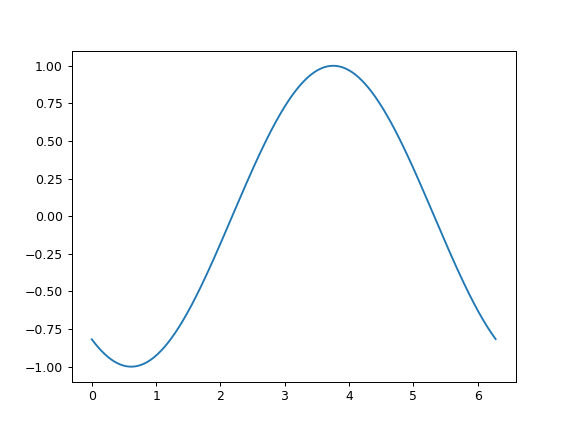

In [47]:
fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i/10.0))  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, init_func=init, frames=100,
                              interval=25, blit=True)
plt.show()

<IPython.core.display.Javascript object>


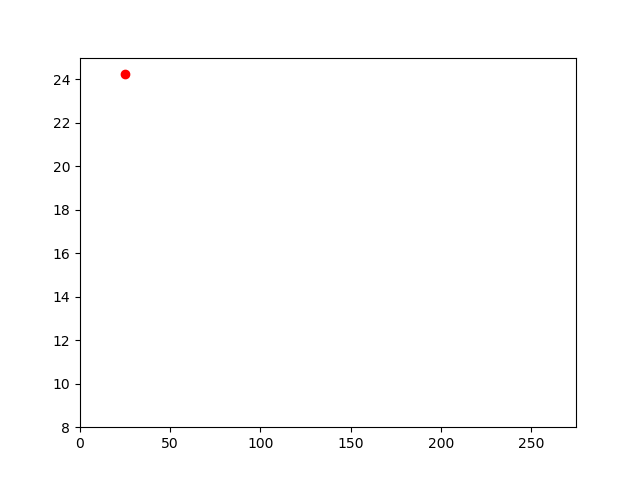

In [61]:
fig1=plt.figure()
ax=plt.axes(xlim=(0,275),ylim=(8,25))
line, = ax.plot(ankle_x_filt[0], ankle_y_filt[0], 'ro')

def init1():
    line.set_data(ankle_x_filt[0], ankle_y_filt[0])
    return line,

def animate1(i):
    x=ankle_x_filt[i]
    y=ankle_y_filt[i]
    line.set_data(x,y)
    return line,

anim = animation.FuncAnimation(fig1, animate1, init_func=init1, frames=1000, interval=500, blit=True)

plt.show()

<IPython.core.display.Javascript object>


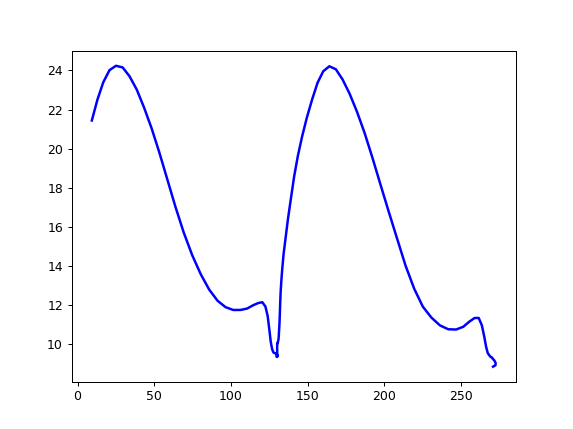

In [51]:
new=plt.plot(ankle_x_filt,ankle_y_filt, linewidth=2, linestyle="-", c="b")